UPDATING FinalFeatures BY ADDING NEW FEATURES. NEW CSV FILE: FinalQrusaderFeatures.csv

In [ ]:
import pandas as pd
from urllib.parse import urlparse

# Load previous dataset
df = pd.read_csv(r"D:\QRMODELTRAINING\backend\CSVFILES\FinalFeatures.csv")

# Define domain lists
major_trusted_domains = [
    'google.com', 'facebook.com', 'github.com', 'microsoft.com', 'amazon.com',
    'apple.com', 'twitter.com', 'linkedin.com', 'youtube.com', 'reddit.com',
    'stackoverflow.com', 'wikipedia.org'
]

educational_domains = [
    '.edu', '.edu.ph', '.edu.au', '.edu.sg', '.edu.my', '.edu.in',
    '.ac.uk', '.edu.cn', '.edu.br', '.edu.mx', '.edu.co', '.ac.in', '.ac.jp'
]

legitimate_tlds = ['.com', '.org', '.net', '.gov', '.mil']
suspicious_tlds = ['.tk', '.ml', '.ga', '.cf', '.pw']
url_shorteners = ['bit.ly', 'tinyurl.com', 'ow.ly', 't.co', 'goo.gl']

# Function to extract new domain features
def extract_new_features(url):
    parsed = urlparse(url)
    hostname = parsed.hostname.lower() if parsed.hostname else ""

    # Trusted domain (combine major trusted, educational, legitimate)
    is_trusted = int(
        any(domain in hostname for domain in major_trusted_domains) or
        any(hostname.endswith(edu) for edu in educational_domains) or
        any(hostname.endswith(tld) for tld in legitimate_tlds)
    )

    # Suspicious TLD
    is_suspicious = int(any(hostname.endswith(tld) for tld in suspicious_tlds))

    # URL shortener
    is_shortener = int(any(short in hostname for short in url_shorteners))

    return pd.Series([is_trusted, is_suspicious, is_shortener])

# Apply to dataset
df[['is_trusted_domain', 'is_suspicious_domain', 'is_url_shortener']] = df['URL'].apply(extract_new_features)

# Column reordering
numerical_features = [
    'subdomain_count', 'digit_letter_ratio', 'repeated_char_count', 
    'query_param_count', 'digit_special_ratio', 'max_path_segment_length', 
    'domain_age_days', 'expiration_days', 'registration_length', 'ns_count'
]

binary_features = [
    'has_ip', 'https_token', 'url_has_suspicious_keywords', 
    'domain_age_missing', 'dns_record', 'registrar_known',
    'is_trusted_domain', 'is_suspicious_domain', 'is_url_shortener'
]

columns_order = ['URL', 'URL_normalized'] + \
                [col for col in numerical_features if col in df.columns] + \
                [col for col in binary_features if col in df.columns] + \
                [col for col in ['Label', 'length_cat'] if col in df.columns]

df = df[columns_order]

# Save updated CSV
df.to_csv(r"D:\QRMODELTRAINING\backend\CSVFILES\FinalQrusaderFeatures.csv", index=False)
print("✅ FinalQrusaderFeatures.csv created with reordered columns successfully!")


✅ FinalQrusaderFeatures.csv created with reordered columns successfully!


ANOTHER FEATURE ANALYSIS SINCE WE ADDED SOME FEATURES: is_trusted_domain_, is_suspicious_domain, is_url_shortener


In [ ]:
data = pd.read_csv(r"D:\QRMODELTRAINING\backend\CSVFILES\FinalQrusaderFeatures.csv")

In [3]:
# ===============================
# Updated feature lists including new QRusader features
# ===============================

numeric_features = [
    'subdomain_count', 'digit_letter_ratio', 'repeated_char_count',
    'query_param_count', 'digit_special_ratio',
    'max_path_segment_length', 'domain_age_days', 'expiration_days',
    'registration_length', 'ns_count'
]

binary_features = [
    'has_ip', 'https_token', 'url_has_suspicious_keywords',
    'domain_age_missing', 'dns_record', 'registrar_known',
    'is_trusted_domain', 'is_suspicious_domain', 'is_url_shortener'
]


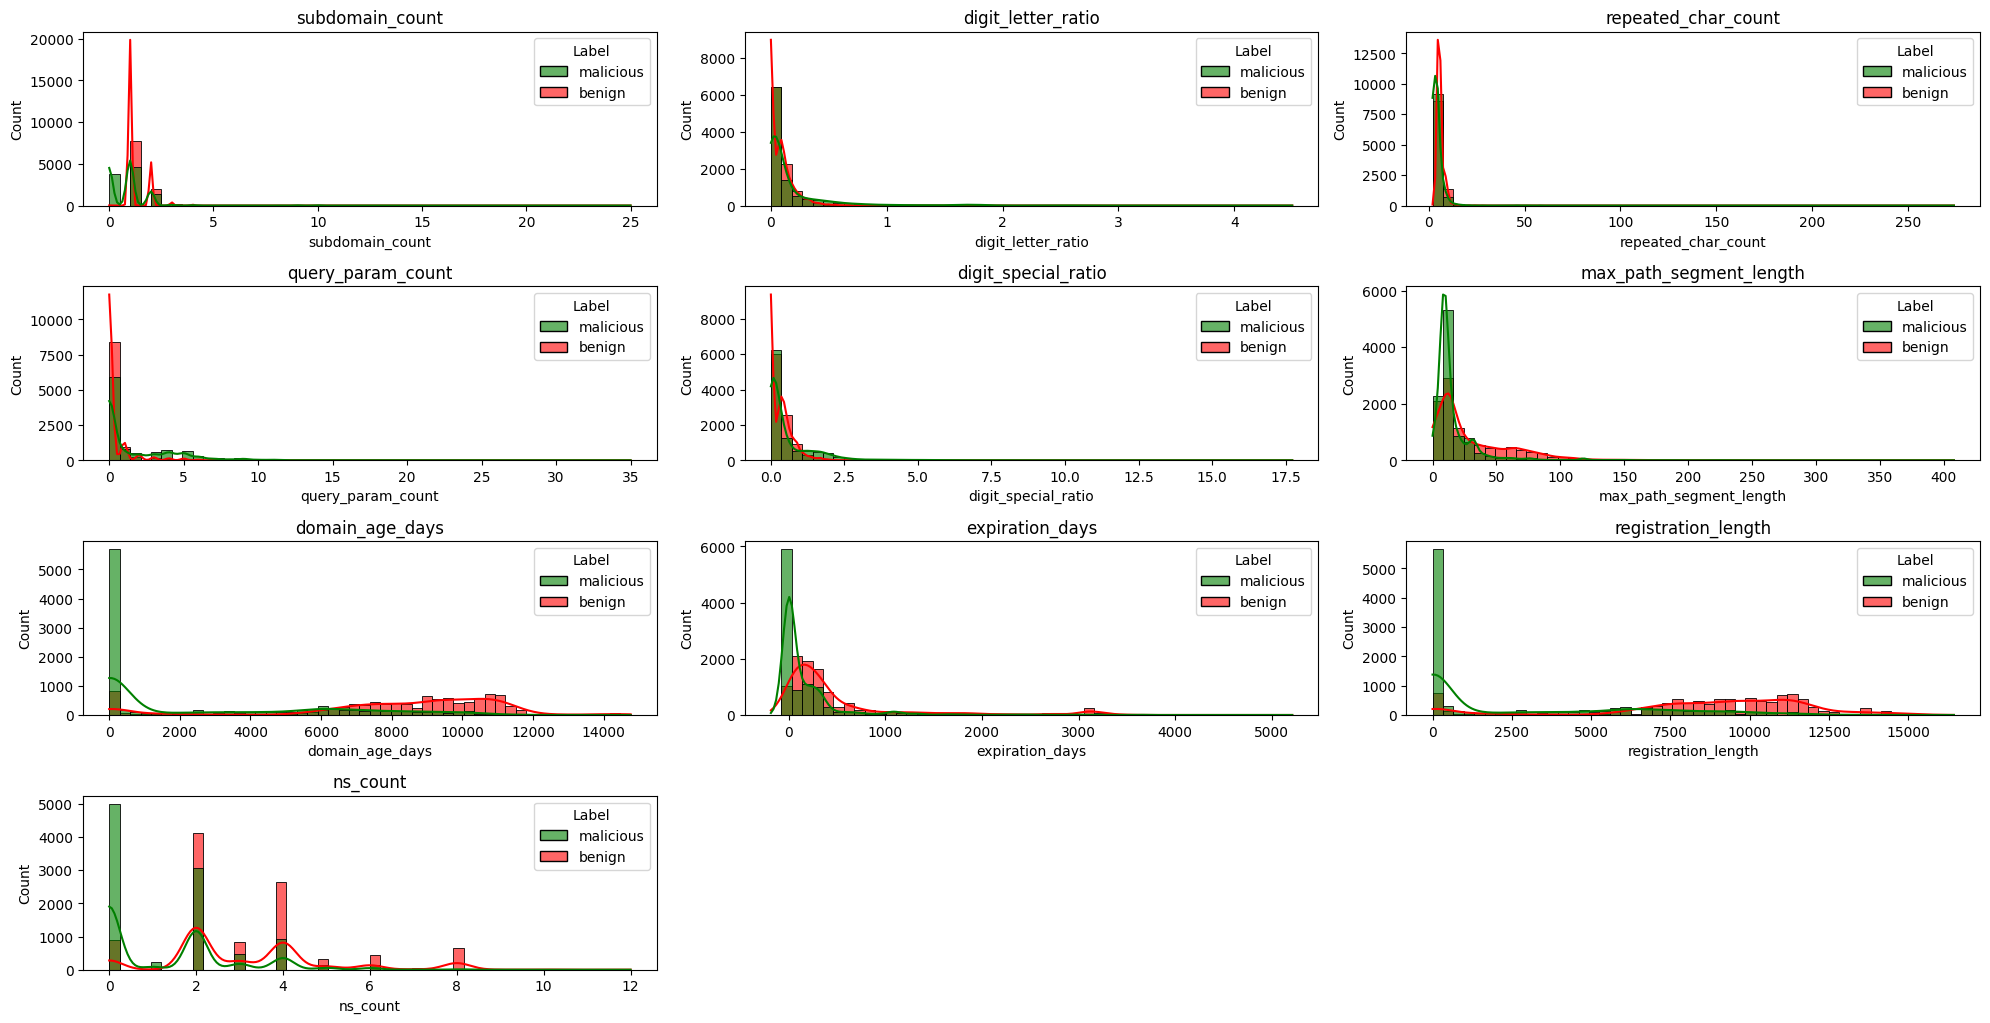

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===============================
# Plot numeric features
# ===============================
# ===============================
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(6, 3, i+1)  # 6 rows x 3 cols grid is fine for 17 features
    if df[feature].nunique() > 1:
        sns.histplot(data=df, x=feature, hue='Label', bins=50, kde=True, palette=['green','red'], alpha=0.6)
    else:
        sns.histplot(data=df, x=feature, hue='Label', bins=50, palette=['green','red'])
    plt.title(feature)
plt.tight_layout()
plt.show()

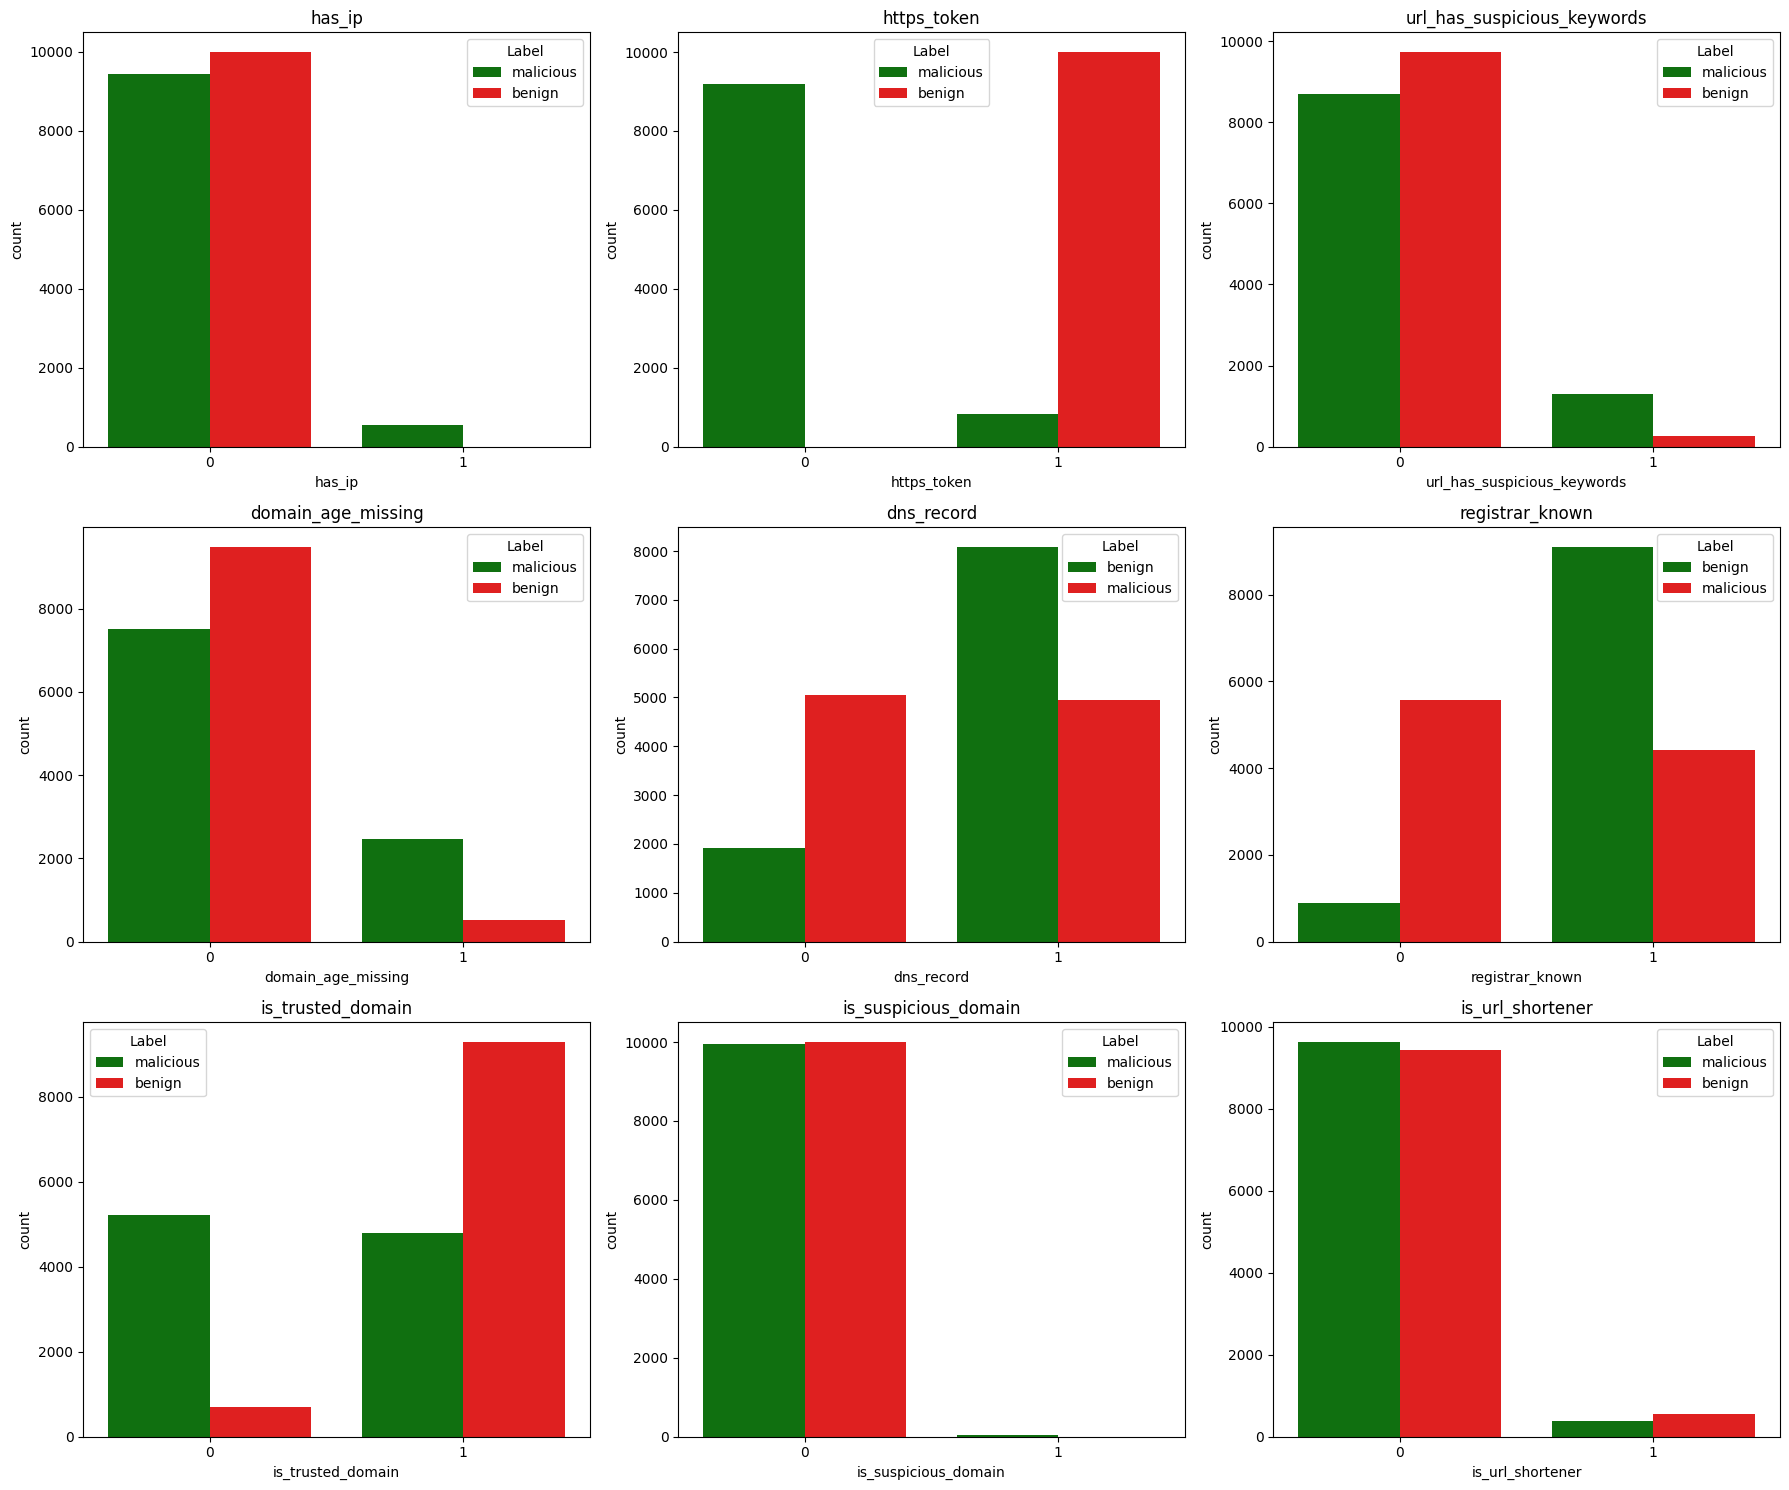

In [5]:
# ===============================
# Plot binary features
# ===============================
n_features = len(binary_features)
n_cols = 3  # how many plots per row
n_rows = (n_features + n_cols - 1) // n_cols  # auto calculate needed rows

plt.figure(figsize=(6 * n_cols, 5 * n_rows))
for i, feature in enumerate(binary_features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.countplot(x=feature, hue='Label', data=df, palette=['green','red'])
    plt.title(feature)
plt.tight_layout()
plt.show()


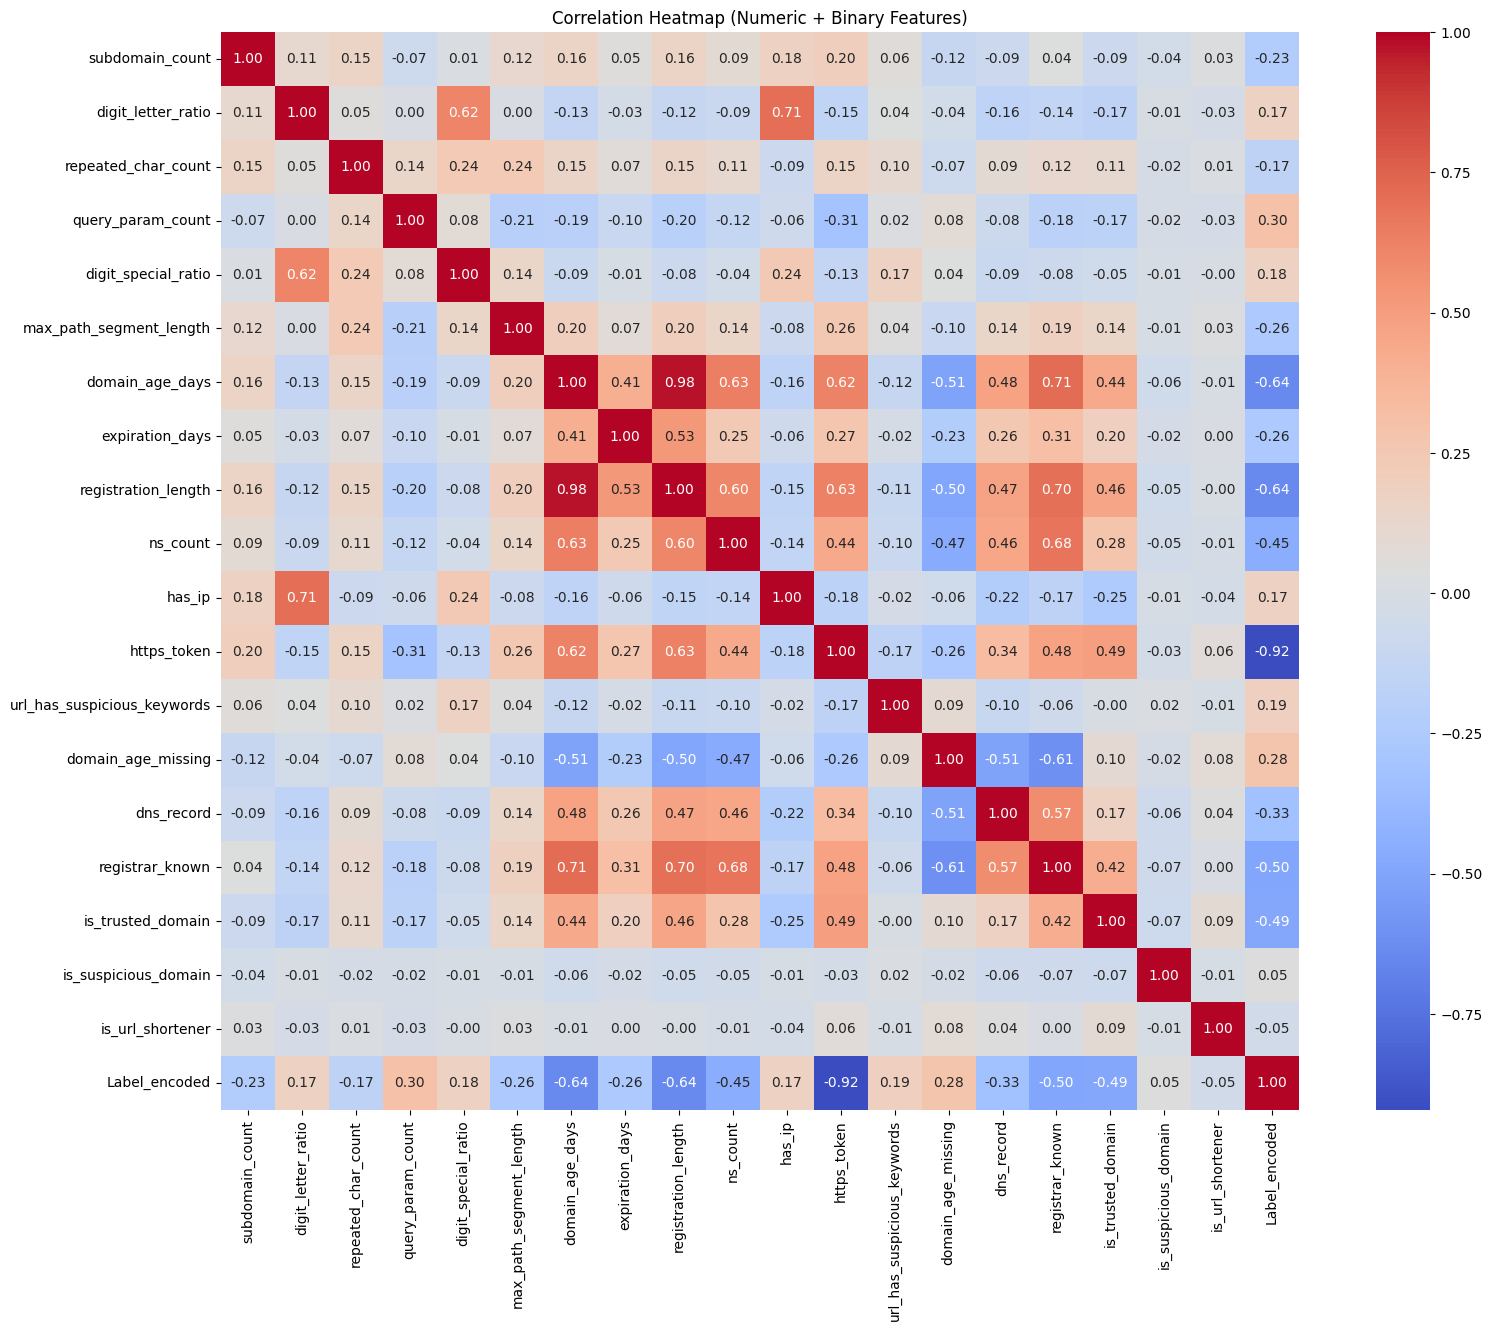

In [6]:
# ===============================
# Correlation heatmap
# ===============================
# Encode labels
df['Label_encoded'] = df['Label'].map({'benign': 0, 'malicious': 1})
plt.figure(figsize=(20, 14))
corr_matrix = df[numeric_features + binary_features + ['Label_encoded']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap (Numeric + Binary Features)")
plt.show()